In [16]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 10
num_classes = 4
batch_size = 64
learning_rate = 0.0001


设置训练集测试集

In [17]:
data_transform = transforms.Compose([
        transforms.Resize((200,200)),
#         transforms.RandomSizedCrop(180),
        transforms.RandomResizedCrop(180, (0.8, 1)),

        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
train_dataset = datasets.ImageFolder(root='data/aaa/train',
                                           transform=data_transform)

test_dataset = datasets.ImageFolder(root='data/aaa/test',
                                           transform=data_transform)
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

建立cnn

In [29]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=2),
            #nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=2),
            #nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=2),
            #nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=2),
            #nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(6272, 200)
        self.fc2 = nn.Linear(200, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out
model = ConvNet(num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

训练模型

In [30]:
loss_all=[]
total_step = len(train_loader)
for learning_rate in [0.1, 0.01,0.001,0.0001]:
    loss_item=[]
# Loss and optimizer
criterion = nn.CrossEntropyLoss()


# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 1== 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            loss_item.append(loss.item())
loss_all.append(loss_item)

Epoch [1/10], Step [1/147], Loss: 1.3821
Epoch [1/10], Step [2/147], Loss: 1.3829
Epoch [1/10], Step [3/147], Loss: 1.3868
Epoch [1/10], Step [4/147], Loss: 1.3695
Epoch [1/10], Step [5/147], Loss: 1.3568
Epoch [1/10], Step [6/147], Loss: 1.3365
Epoch [1/10], Step [7/147], Loss: 1.3175
Epoch [1/10], Step [8/147], Loss: 1.2965
Epoch [1/10], Step [9/147], Loss: 1.3079
Epoch [1/10], Step [10/147], Loss: 1.2699
Epoch [1/10], Step [11/147], Loss: 1.2022
Epoch [1/10], Step [12/147], Loss: 1.0951
Epoch [1/10], Step [13/147], Loss: 1.1553
Epoch [1/10], Step [14/147], Loss: 0.9799
Epoch [1/10], Step [15/147], Loss: 0.9511
Epoch [1/10], Step [16/147], Loss: 0.9484
Epoch [1/10], Step [17/147], Loss: 0.9020
Epoch [1/10], Step [18/147], Loss: 0.9103
Epoch [1/10], Step [19/147], Loss: 0.9853
Epoch [1/10], Step [20/147], Loss: 0.8281
Epoch [1/10], Step [21/147], Loss: 0.8759
Epoch [1/10], Step [22/147], Loss: 0.9520
Epoch [1/10], Step [23/147], Loss: 0.9821
Epoch [1/10], Step [24/147], Loss: 0.9208
E

Epoch [2/10], Step [49/147], Loss: 0.5762
Epoch [2/10], Step [50/147], Loss: 0.5836
Epoch [2/10], Step [51/147], Loss: 0.4796
Epoch [2/10], Step [52/147], Loss: 0.4322
Epoch [2/10], Step [53/147], Loss: 0.3839
Epoch [2/10], Step [54/147], Loss: 0.5230
Epoch [2/10], Step [55/147], Loss: 0.4655
Epoch [2/10], Step [56/147], Loss: 0.4799
Epoch [2/10], Step [57/147], Loss: 0.5141
Epoch [2/10], Step [58/147], Loss: 0.4507
Epoch [2/10], Step [59/147], Loss: 0.5583
Epoch [2/10], Step [60/147], Loss: 0.4686
Epoch [2/10], Step [61/147], Loss: 0.3466
Epoch [2/10], Step [62/147], Loss: 0.5462
Epoch [2/10], Step [63/147], Loss: 0.6877
Epoch [2/10], Step [64/147], Loss: 0.5621
Epoch [2/10], Step [65/147], Loss: 0.6398
Epoch [2/10], Step [66/147], Loss: 0.3784
Epoch [2/10], Step [67/147], Loss: 0.5660
Epoch [2/10], Step [68/147], Loss: 0.3747
Epoch [2/10], Step [69/147], Loss: 0.5787
Epoch [2/10], Step [70/147], Loss: 0.6216
Epoch [2/10], Step [71/147], Loss: 0.5295
Epoch [2/10], Step [72/147], Loss:

Epoch [3/10], Step [97/147], Loss: 0.5962
Epoch [3/10], Step [98/147], Loss: 0.6797
Epoch [3/10], Step [99/147], Loss: 0.6249
Epoch [3/10], Step [100/147], Loss: 0.4946
Epoch [3/10], Step [101/147], Loss: 0.5388
Epoch [3/10], Step [102/147], Loss: 0.3855
Epoch [3/10], Step [103/147], Loss: 0.3591
Epoch [3/10], Step [104/147], Loss: 0.4111
Epoch [3/10], Step [105/147], Loss: 0.5003
Epoch [3/10], Step [106/147], Loss: 0.3943
Epoch [3/10], Step [107/147], Loss: 0.3185
Epoch [3/10], Step [108/147], Loss: 0.5478
Epoch [3/10], Step [109/147], Loss: 0.3022
Epoch [3/10], Step [110/147], Loss: 0.4416
Epoch [3/10], Step [111/147], Loss: 0.4331
Epoch [3/10], Step [112/147], Loss: 0.4054
Epoch [3/10], Step [113/147], Loss: 0.4051
Epoch [3/10], Step [114/147], Loss: 0.4319
Epoch [3/10], Step [115/147], Loss: 0.3778
Epoch [3/10], Step [116/147], Loss: 0.3258
Epoch [3/10], Step [117/147], Loss: 0.2577
Epoch [3/10], Step [118/147], Loss: 0.4899
Epoch [3/10], Step [119/147], Loss: 0.3113
Epoch [3/10], 

Epoch [4/10], Step [144/147], Loss: 0.5940
Epoch [4/10], Step [145/147], Loss: 0.3983
Epoch [4/10], Step [146/147], Loss: 0.3252
Epoch [4/10], Step [147/147], Loss: 0.2753
Epoch [5/10], Step [1/147], Loss: 0.3075
Epoch [5/10], Step [2/147], Loss: 0.3636
Epoch [5/10], Step [3/147], Loss: 0.4336
Epoch [5/10], Step [4/147], Loss: 0.4574
Epoch [5/10], Step [5/147], Loss: 0.4770
Epoch [5/10], Step [6/147], Loss: 0.3582
Epoch [5/10], Step [7/147], Loss: 0.2714
Epoch [5/10], Step [8/147], Loss: 0.5538
Epoch [5/10], Step [9/147], Loss: 0.4027
Epoch [5/10], Step [10/147], Loss: 0.3136
Epoch [5/10], Step [11/147], Loss: 0.2632
Epoch [5/10], Step [12/147], Loss: 0.2123
Epoch [5/10], Step [13/147], Loss: 0.3060
Epoch [5/10], Step [14/147], Loss: 0.3164
Epoch [5/10], Step [15/147], Loss: 0.4878
Epoch [5/10], Step [16/147], Loss: 0.4585
Epoch [5/10], Step [17/147], Loss: 0.3153
Epoch [5/10], Step [18/147], Loss: 0.2187
Epoch [5/10], Step [19/147], Loss: 0.5027
Epoch [5/10], Step [20/147], Loss: 0.45

Epoch [6/10], Step [45/147], Loss: 0.2405
Epoch [6/10], Step [46/147], Loss: 0.5319
Epoch [6/10], Step [47/147], Loss: 0.2508
Epoch [6/10], Step [48/147], Loss: 0.2768
Epoch [6/10], Step [49/147], Loss: 0.2534
Epoch [6/10], Step [50/147], Loss: 0.4990
Epoch [6/10], Step [51/147], Loss: 0.4824
Epoch [6/10], Step [52/147], Loss: 0.3691
Epoch [6/10], Step [53/147], Loss: 0.3120
Epoch [6/10], Step [54/147], Loss: 0.4884
Epoch [6/10], Step [55/147], Loss: 0.2600
Epoch [6/10], Step [56/147], Loss: 0.2772
Epoch [6/10], Step [57/147], Loss: 0.2630
Epoch [6/10], Step [58/147], Loss: 0.3258
Epoch [6/10], Step [59/147], Loss: 0.3084
Epoch [6/10], Step [60/147], Loss: 0.4418
Epoch [6/10], Step [61/147], Loss: 0.3283
Epoch [6/10], Step [62/147], Loss: 0.2618
Epoch [6/10], Step [63/147], Loss: 0.4244
Epoch [6/10], Step [64/147], Loss: 0.2697
Epoch [6/10], Step [65/147], Loss: 0.3916
Epoch [6/10], Step [66/147], Loss: 0.4225
Epoch [6/10], Step [67/147], Loss: 0.3096
Epoch [6/10], Step [68/147], Loss:

Epoch [7/10], Step [93/147], Loss: 0.3107
Epoch [7/10], Step [94/147], Loss: 0.4178
Epoch [7/10], Step [95/147], Loss: 0.3768
Epoch [7/10], Step [96/147], Loss: 0.3535
Epoch [7/10], Step [97/147], Loss: 0.2713
Epoch [7/10], Step [98/147], Loss: 0.2203
Epoch [7/10], Step [99/147], Loss: 0.2758
Epoch [7/10], Step [100/147], Loss: 0.4228
Epoch [7/10], Step [101/147], Loss: 0.2810
Epoch [7/10], Step [102/147], Loss: 0.4188
Epoch [7/10], Step [103/147], Loss: 0.3164
Epoch [7/10], Step [104/147], Loss: 0.3195
Epoch [7/10], Step [105/147], Loss: 0.4098
Epoch [7/10], Step [106/147], Loss: 0.1980
Epoch [7/10], Step [107/147], Loss: 0.3295
Epoch [7/10], Step [108/147], Loss: 0.2354
Epoch [7/10], Step [109/147], Loss: 0.3246
Epoch [7/10], Step [110/147], Loss: 0.2714
Epoch [7/10], Step [111/147], Loss: 0.5791
Epoch [7/10], Step [112/147], Loss: 0.2850
Epoch [7/10], Step [113/147], Loss: 0.3575
Epoch [7/10], Step [114/147], Loss: 0.2122
Epoch [7/10], Step [115/147], Loss: 0.1526
Epoch [7/10], Step

Epoch [8/10], Step [140/147], Loss: 0.3481
Epoch [8/10], Step [141/147], Loss: 0.4096
Epoch [8/10], Step [142/147], Loss: 0.2700
Epoch [8/10], Step [143/147], Loss: 0.2835
Epoch [8/10], Step [144/147], Loss: 0.2650
Epoch [8/10], Step [145/147], Loss: 0.3626
Epoch [8/10], Step [146/147], Loss: 0.3126
Epoch [8/10], Step [147/147], Loss: 0.1437
Epoch [9/10], Step [1/147], Loss: 0.2293
Epoch [9/10], Step [2/147], Loss: 0.2213
Epoch [9/10], Step [3/147], Loss: 0.2712
Epoch [9/10], Step [4/147], Loss: 0.2134
Epoch [9/10], Step [5/147], Loss: 0.3837
Epoch [9/10], Step [6/147], Loss: 0.5159
Epoch [9/10], Step [7/147], Loss: 0.1234
Epoch [9/10], Step [8/147], Loss: 0.2375
Epoch [9/10], Step [9/147], Loss: 0.3687
Epoch [9/10], Step [10/147], Loss: 0.2597
Epoch [9/10], Step [11/147], Loss: 0.3152
Epoch [9/10], Step [12/147], Loss: 0.3868
Epoch [9/10], Step [13/147], Loss: 0.3646
Epoch [9/10], Step [14/147], Loss: 0.2891
Epoch [9/10], Step [15/147], Loss: 0.2371
Epoch [9/10], Step [16/147], Loss: 

Epoch [10/10], Step [40/147], Loss: 0.2278
Epoch [10/10], Step [41/147], Loss: 0.1515
Epoch [10/10], Step [42/147], Loss: 0.3661
Epoch [10/10], Step [43/147], Loss: 0.1914
Epoch [10/10], Step [44/147], Loss: 0.3416
Epoch [10/10], Step [45/147], Loss: 0.0915
Epoch [10/10], Step [46/147], Loss: 0.3056
Epoch [10/10], Step [47/147], Loss: 0.2849
Epoch [10/10], Step [48/147], Loss: 0.2995
Epoch [10/10], Step [49/147], Loss: 0.2099
Epoch [10/10], Step [50/147], Loss: 0.1830
Epoch [10/10], Step [51/147], Loss: 0.2573
Epoch [10/10], Step [52/147], Loss: 0.2101
Epoch [10/10], Step [53/147], Loss: 0.4184
Epoch [10/10], Step [54/147], Loss: 0.1624
Epoch [10/10], Step [55/147], Loss: 0.1997
Epoch [10/10], Step [56/147], Loss: 0.2790
Epoch [10/10], Step [57/147], Loss: 0.3829
Epoch [10/10], Step [58/147], Loss: 0.3639
Epoch [10/10], Step [59/147], Loss: 0.2418
Epoch [10/10], Step [60/147], Loss: 0.3023
Epoch [10/10], Step [61/147], Loss: 0.2195
Epoch [10/10], Step [62/147], Loss: 0.2724
Epoch [10/1

(1470, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

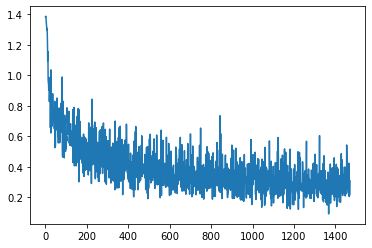

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
loss_all_array=np.array(loss_all)
print(loss_all_array.T.shape)
plt.plot(loss_all_array.T[:,0],label='0.1')
plt.plot(loss_all_array.T[:,1],label='0.01')
plt.plot(loss_all_array.T[:,2],label='0.001')
plt.plot(loss_all_array.T[:,3],label='0.0001')
plt.ylabel('loss',fontsize=16)
plt.xlabel('iter',fontsize=16)
plt.legend()
plt.show()

In [32]:
# Test the modely_test=labels_all

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    predicted_all=[]
    labels_all=[]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        labels_all=labels_all+labels.cpu().numpy().tolist()
        predicted_all=predicted_all+predicted.cpu().numpy().tolist()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint

Test Accuracy of the model on the 10000 test images: 89.19054801407742 %


混淆矩阵

In [8]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [9]:
y_test = labels_all
y_pred = predicted_all
predicted_all

[2,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 0,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 2,
 1,
 3,
 0,
 3,
 1,
 3,
 0,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 0,
 3,
 1,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 1,
 3,
 1,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 1,
 3,
 2,
 1,
 0,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 2,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 0,
 2,
 2,
 0,
 3,
 1,
 3,
 1,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 0,
 3,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 0,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 1,
 2,
 0,
 3,
 1,
 0,
 3,
 3,
 3,
 3,
 1,
 0,


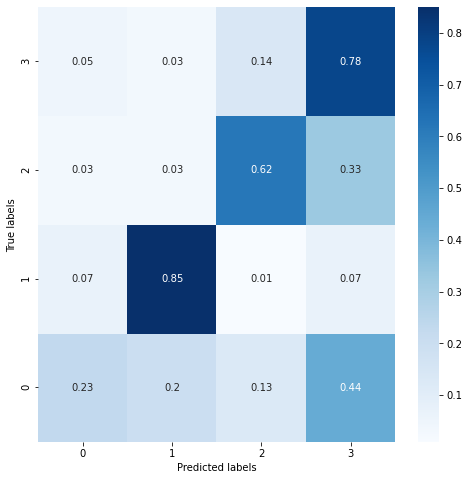

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
con_mat = confusion_matrix(y_test, y_pred)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]     # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)
# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
plt.ylim(0,4)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


vgg

In [11]:
!pip install tensorboardX

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


You should consider upgrading via the 'd:\anaconda\python.exe -m pip install --upgrade pip' command.


In [12]:
# --coding:utf-8--
 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from tensorboardX import SummaryWriter
model_ft = models.vgg16(pretrained=True)
# 冻结卷积层
for name, par in model_ft.named_parameters():
    if 'features' in name:
        par.requires_grad = False

#修改几层
model_ft.classifier[6] = nn.Linear(4096, 4)
model_ft = model_ft.to(device)
# Decay LR by a factor of 0.1 every 7 epochs
optimizer_ft = optim.SGD(lr=learning_rate, params=filter(lambda p: p.requires_grad, model_ft.parameters()))

In [13]:
learning_rate=0.1
# Loss and optimizer
criterion = nn.CrossEntropyLoss()

#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_ft(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer_ft.zero_grad()
        loss.backward()
        optimizer_ft.step()

        if (i + 1) % 1== 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/10], Step [1/147], Loss: 1.4379
Epoch [1/10], Step [2/147], Loss: 1.3997
Epoch [1/10], Step [3/147], Loss: 1.4790
Epoch [1/10], Step [4/147], Loss: 1.4695
Epoch [1/10], Step [5/147], Loss: 1.4643
Epoch [1/10], Step [6/147], Loss: 1.4831
Epoch [1/10], Step [7/147], Loss: 1.4472
Epoch [1/10], Step [8/147], Loss: 1.4348
Epoch [1/10], Step [9/147], Loss: 1.4378
Epoch [1/10], Step [10/147], Loss: 1.4314
Epoch [1/10], Step [11/147], Loss: 1.4795
Epoch [1/10], Step [12/147], Loss: 1.3839
Epoch [1/10], Step [13/147], Loss: 1.4646
Epoch [1/10], Step [14/147], Loss: 1.4742
Epoch [1/10], Step [15/147], Loss: 1.3748
Epoch [1/10], Step [16/147], Loss: 1.4302
Epoch [1/10], Step [17/147], Loss: 1.3835
Epoch [1/10], Step [18/147], Loss: 1.3999
Epoch [1/10], Step [19/147], Loss: 1.4350
Epoch [1/10], Step [20/147], Loss: 1.4008
Epoch [1/10], Step [21/147], Loss: 1.4115
Epoch [1/10], Step [22/147], Loss: 1.3735
Epoch [1/10], Step [23/147], Loss: 1.3876
Epoch [1/10], Step [24/147], Loss: 1.4647
E

Epoch [2/10], Step [49/147], Loss: 0.9149
Epoch [2/10], Step [50/147], Loss: 1.0498
Epoch [2/10], Step [51/147], Loss: 1.0218
Epoch [2/10], Step [52/147], Loss: 1.0635
Epoch [2/10], Step [53/147], Loss: 1.0249
Epoch [2/10], Step [54/147], Loss: 1.0145
Epoch [2/10], Step [55/147], Loss: 0.9946
Epoch [2/10], Step [56/147], Loss: 1.0064
Epoch [2/10], Step [57/147], Loss: 0.9871
Epoch [2/10], Step [58/147], Loss: 1.0223
Epoch [2/10], Step [59/147], Loss: 1.0054
Epoch [2/10], Step [60/147], Loss: 1.0416
Epoch [2/10], Step [61/147], Loss: 1.0150
Epoch [2/10], Step [62/147], Loss: 0.9796
Epoch [2/10], Step [63/147], Loss: 0.9928
Epoch [2/10], Step [64/147], Loss: 1.0534
Epoch [2/10], Step [65/147], Loss: 0.9405
Epoch [2/10], Step [66/147], Loss: 0.9305
Epoch [2/10], Step [67/147], Loss: 0.9470
Epoch [2/10], Step [68/147], Loss: 0.9963
Epoch [2/10], Step [69/147], Loss: 1.0163
Epoch [2/10], Step [70/147], Loss: 0.9784
Epoch [2/10], Step [71/147], Loss: 0.9735
Epoch [2/10], Step [72/147], Loss:

Epoch [3/10], Step [97/147], Loss: 0.7159
Epoch [3/10], Step [98/147], Loss: 0.8175
Epoch [3/10], Step [99/147], Loss: 0.7270
Epoch [3/10], Step [100/147], Loss: 0.7534
Epoch [3/10], Step [101/147], Loss: 0.8395
Epoch [3/10], Step [102/147], Loss: 0.7757
Epoch [3/10], Step [103/147], Loss: 0.8174
Epoch [3/10], Step [104/147], Loss: 0.8018
Epoch [3/10], Step [105/147], Loss: 0.7683
Epoch [3/10], Step [106/147], Loss: 0.7837
Epoch [3/10], Step [107/147], Loss: 0.8021
Epoch [3/10], Step [108/147], Loss: 0.7498
Epoch [3/10], Step [109/147], Loss: 0.7340
Epoch [3/10], Step [110/147], Loss: 0.7924
Epoch [3/10], Step [111/147], Loss: 0.7120
Epoch [3/10], Step [112/147], Loss: 0.7186
Epoch [3/10], Step [113/147], Loss: 0.7684
Epoch [3/10], Step [114/147], Loss: 0.7198
Epoch [3/10], Step [115/147], Loss: 0.7383
Epoch [3/10], Step [116/147], Loss: 0.7812
Epoch [3/10], Step [117/147], Loss: 0.7600
Epoch [3/10], Step [118/147], Loss: 0.7070
Epoch [3/10], Step [119/147], Loss: 0.7478
Epoch [3/10], 

Epoch [4/10], Step [144/147], Loss: 0.5729
Epoch [4/10], Step [145/147], Loss: 0.6556
Epoch [4/10], Step [146/147], Loss: 0.6266
Epoch [4/10], Step [147/147], Loss: 0.6261
Epoch [5/10], Step [1/147], Loss: 0.5992
Epoch [5/10], Step [2/147], Loss: 0.6188
Epoch [5/10], Step [3/147], Loss: 0.6318
Epoch [5/10], Step [4/147], Loss: 0.7010
Epoch [5/10], Step [5/147], Loss: 0.5684
Epoch [5/10], Step [6/147], Loss: 0.5896
Epoch [5/10], Step [7/147], Loss: 0.6616
Epoch [5/10], Step [8/147], Loss: 0.6230
Epoch [5/10], Step [9/147], Loss: 0.7149
Epoch [5/10], Step [10/147], Loss: 0.6198
Epoch [5/10], Step [11/147], Loss: 0.6516
Epoch [5/10], Step [12/147], Loss: 0.5825
Epoch [5/10], Step [13/147], Loss: 0.6128
Epoch [5/10], Step [14/147], Loss: 0.6053
Epoch [5/10], Step [15/147], Loss: 0.6968
Epoch [5/10], Step [16/147], Loss: 0.6387
Epoch [5/10], Step [17/147], Loss: 0.6506
Epoch [5/10], Step [18/147], Loss: 0.5471
Epoch [5/10], Step [19/147], Loss: 0.6372
Epoch [5/10], Step [20/147], Loss: 0.66

Epoch [6/10], Step [45/147], Loss: 0.5163
Epoch [6/10], Step [46/147], Loss: 0.5254
Epoch [6/10], Step [47/147], Loss: 0.6125
Epoch [6/10], Step [48/147], Loss: 0.4944
Epoch [6/10], Step [49/147], Loss: 0.4770
Epoch [6/10], Step [50/147], Loss: 0.5447
Epoch [6/10], Step [51/147], Loss: 0.5503
Epoch [6/10], Step [52/147], Loss: 0.5275
Epoch [6/10], Step [53/147], Loss: 0.5525
Epoch [6/10], Step [54/147], Loss: 0.5633
Epoch [6/10], Step [55/147], Loss: 0.5361
Epoch [6/10], Step [56/147], Loss: 0.5613
Epoch [6/10], Step [57/147], Loss: 0.5237
Epoch [6/10], Step [58/147], Loss: 0.5662
Epoch [6/10], Step [59/147], Loss: 0.4950
Epoch [6/10], Step [60/147], Loss: 0.5613
Epoch [6/10], Step [61/147], Loss: 0.5448
Epoch [6/10], Step [62/147], Loss: 0.4895
Epoch [6/10], Step [63/147], Loss: 0.5250
Epoch [6/10], Step [64/147], Loss: 0.5757
Epoch [6/10], Step [65/147], Loss: 0.5152
Epoch [6/10], Step [66/147], Loss: 0.5270
Epoch [6/10], Step [67/147], Loss: 0.4669
Epoch [6/10], Step [68/147], Loss:

Epoch [7/10], Step [93/147], Loss: 0.5400
Epoch [7/10], Step [94/147], Loss: 0.4900
Epoch [7/10], Step [95/147], Loss: 0.4505
Epoch [7/10], Step [96/147], Loss: 0.4700
Epoch [7/10], Step [97/147], Loss: 0.5066
Epoch [7/10], Step [98/147], Loss: 0.4405
Epoch [7/10], Step [99/147], Loss: 0.4664
Epoch [7/10], Step [100/147], Loss: 0.5775
Epoch [7/10], Step [101/147], Loss: 0.5487
Epoch [7/10], Step [102/147], Loss: 0.5191
Epoch [7/10], Step [103/147], Loss: 0.4834
Epoch [7/10], Step [104/147], Loss: 0.4370
Epoch [7/10], Step [105/147], Loss: 0.4658
Epoch [7/10], Step [106/147], Loss: 0.5119
Epoch [7/10], Step [107/147], Loss: 0.3981
Epoch [7/10], Step [108/147], Loss: 0.4736
Epoch [7/10], Step [109/147], Loss: 0.5465
Epoch [7/10], Step [110/147], Loss: 0.5729
Epoch [7/10], Step [111/147], Loss: 0.4893
Epoch [7/10], Step [112/147], Loss: 0.4827
Epoch [7/10], Step [113/147], Loss: 0.4367
Epoch [7/10], Step [114/147], Loss: 0.4841
Epoch [7/10], Step [115/147], Loss: 0.4643
Epoch [7/10], Step

Epoch [8/10], Step [140/147], Loss: 0.4263
Epoch [8/10], Step [141/147], Loss: 0.5218
Epoch [8/10], Step [142/147], Loss: 0.5195
Epoch [8/10], Step [143/147], Loss: 0.3929
Epoch [8/10], Step [144/147], Loss: 0.4711
Epoch [8/10], Step [145/147], Loss: 0.5642
Epoch [8/10], Step [146/147], Loss: 0.4626
Epoch [8/10], Step [147/147], Loss: 0.4746
Epoch [9/10], Step [1/147], Loss: 0.4528
Epoch [9/10], Step [2/147], Loss: 0.4489
Epoch [9/10], Step [3/147], Loss: 0.4992
Epoch [9/10], Step [4/147], Loss: 0.5097
Epoch [9/10], Step [5/147], Loss: 0.4784
Epoch [9/10], Step [6/147], Loss: 0.4873
Epoch [9/10], Step [7/147], Loss: 0.4611
Epoch [9/10], Step [8/147], Loss: 0.4109
Epoch [9/10], Step [9/147], Loss: 0.4601
Epoch [9/10], Step [10/147], Loss: 0.4748
Epoch [9/10], Step [11/147], Loss: 0.4046
Epoch [9/10], Step [12/147], Loss: 0.4887
Epoch [9/10], Step [13/147], Loss: 0.3956
Epoch [9/10], Step [14/147], Loss: 0.4542
Epoch [9/10], Step [15/147], Loss: 0.4489
Epoch [9/10], Step [16/147], Loss: 

Epoch [10/10], Step [40/147], Loss: 0.3903
Epoch [10/10], Step [41/147], Loss: 0.4243
Epoch [10/10], Step [42/147], Loss: 0.3611
Epoch [10/10], Step [43/147], Loss: 0.3937
Epoch [10/10], Step [44/147], Loss: 0.4596
Epoch [10/10], Step [45/147], Loss: 0.5074
Epoch [10/10], Step [46/147], Loss: 0.5016
Epoch [10/10], Step [47/147], Loss: 0.4356
Epoch [10/10], Step [48/147], Loss: 0.3956
Epoch [10/10], Step [49/147], Loss: 0.5199
Epoch [10/10], Step [50/147], Loss: 0.4524
Epoch [10/10], Step [51/147], Loss: 0.3890
Epoch [10/10], Step [52/147], Loss: 0.4338
Epoch [10/10], Step [53/147], Loss: 0.4400
Epoch [10/10], Step [54/147], Loss: 0.4080
Epoch [10/10], Step [55/147], Loss: 0.3829
Epoch [10/10], Step [56/147], Loss: 0.3927
Epoch [10/10], Step [57/147], Loss: 0.3674
Epoch [10/10], Step [58/147], Loss: 0.4268
Epoch [10/10], Step [59/147], Loss: 0.3717
Epoch [10/10], Step [60/147], Loss: 0.4640
Epoch [10/10], Step [61/147], Loss: 0.3991
Epoch [10/10], Step [62/147], Loss: 0.4137
Epoch [10/1

In [14]:
# Test the modely_test=labels_all

model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    predicted_all=[]
    labels_all=[]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        labels_all=labels_all+labels.cpu().numpy().tolist()
        predicted_all=predicted_all+predicted.cpu().numpy().tolist()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 87.93363499245852 %


热力图

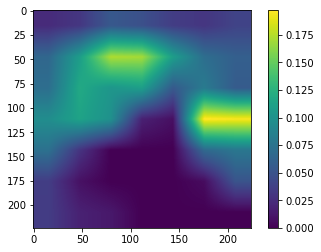

In [27]:
import torch
from torchvision import models
import torch.nn as nn
import torchvision.transforms as tfs
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
class cal_cam(nn.Module):
    def __init__(self, feature_layer="layer4"):
        super(cal_cam, self).__init__()
        self.model = models.resnet18(pretrained=False)
        self.model.load_state_dict(torch.load("C:/Users/DELL/Desktop/class9 transfer learning example2/class9 transfer learning example/resnet18-5c106cde.pth"))
#自己的resnet18的地址
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
 
        # 要求梯度的层
        self.feature_layer = feature_layer
        # 记录梯度
        self.gradient = []
        # 记录输出的特征图
        self.output = []
        self.means = [0.485, 0.456, 0.406]
        self.stds = [0.229, 0.224, 0.225]
 
        self.trainsform = tfs.Compose([
            tfs.ToTensor(),
            tfs.Normalize(self.means, self.stds)
        ])
 
    def save_grad(self, grad):
        self.gradient.append(grad)
 
    def get_grad(self):
        return self.gradient[-1].cpu().data
 
    def get_feature(self):
        return self.output[-1][0]
 
 
    def process_img(self, input):
        input = self.trainsform(input)
        input = input.unsqueeze(0)
        return input
 
    # 计算最后一个卷积层的梯度，输出梯度和最后一个卷积层的特征图
    def getGrad(self, input_):
        input_ = input_.to(self.device).requires_grad_(True)
        num = 1
        for name, module in self.model._modules.items():
            if(num == 1):
                input = module(input_)
                num = num + 1
                continue
            # 是待提取特征图的层
            if (name == self.feature_layer):
                input = module(input)
                input.register_hook(self.save_grad)
                self.output.append([input])
            # 马上要到全连接层了
            elif (name == "avgpool"):
                input = module(input)
                input = input.reshape(input.shape[0], -1)
            # 普通的层
            else:
                input = module(input)
 
        # 到这里input就是最后全连接层的输出了
        index = torch.max(input, dim=-1)[1]
        one_hot = torch.zeros((1, input.shape[-1]), dtype=torch.float32)
        one_hot[0][index] = 1
        confidenct = one_hot * input.cpu()
        confidenct = torch.sum(confidenct, dim=-1).requires_grad_(True)
        # print(confidenct)
        self.model.zero_grad()
        # 反向传播获取梯度
        confidenct.backward(retain_graph=True)
        # 获取特征图的梯度
        grad_val = self.get_grad()
        feature = self.get_feature()
        return grad_val, feature, input_.grad
 
    # 计算CAM
    def getCam(self, grad_val, feature):
        # 对特征图的每个通道进行全局池化
        alpha = torch.mean(grad_val, dim=(2,3)).cpu()
        feature = feature.cpu()
        # 将池化后的结果和相应通道特征图相乘
        cam = torch.zeros((feature.shape[2],feature.shape[3]), dtype=torch.float32)
        for idx in range(alpha.shape[1]):
            cam = cam + alpha[0][idx]*feature[0][idx]
        # 进行ReLU操作
        cam = np.maximum(cam.detach().numpy(), 0)
 
 
 
        plt.imshow(cam)
        plt.colorbar()
        plt.savefig("./cam.jpg")
 
        # 将cam区域放大到输入图片大小
        cam_ = cv2.resize(cam, (224,224))
        cam_ = cam_ - np.min(cam_)
        cam_ = cam_ / np.max(cam_)
        plt.imshow(cam_)
        plt.savefig("./cam_.jpg")
        cam = torch.from_numpy(cam)
 
 
 
        return cam, cam_
 
    def show_img(self, cam_, img):
        heatmap = cv2.applyColorMap(np.uint8(255 * cam_), cv2.COLORMAP_JET)
        cam_img = 0.3 * heatmap + 0.7 * np.float32(img)
        cv2.imwrite("img.jpg", cam_img)
 
    def __call__(self, img_root):
        img = Image.open(img_root)
        img = img.resize((224,224))
        plt.imshow(img)
        plt.savefig("4.jpg")
        #要热力图的图片
        input = self.process_img(img)
        grad_val, feature, input_grad = self.getGrad(input)
        cam, cam_ = self.getCam(grad_val, feature)
        self.show_img(cam_, img)
        return cam
 
 
if __name__ == "__main__":
    cam = cal_cam()
    #图片地址
    img_root = r'C:\Users\DELL\Desktop\class9 transfer learning example2\class9 transfer learning example\data\aaa\train\buildings\4.jpg'
    cam(img_root)

其他模型

epoch:  0 train_loss:  0.008 train_accuracy:  0.819 test_loss:  0.004 test_accuracy:  0.901
epoch:  1 train_loss:  0.004 train_accuracy:  0.899 test_loss:  0.004 test_accuracy:  0.911
epoch:  2 train_loss:  0.004 train_accuracy:  0.904 test_loss:  0.004 test_accuracy:  0.915
epoch:  3 train_loss:  0.004 train_accuracy:  0.91 test_loss:  0.004 test_accuracy:  0.912
epoch:  4 train_loss:  0.004 train_accuracy:  0.909 test_loss:  0.003 test_accuracy:  0.917
1722.7123746871948


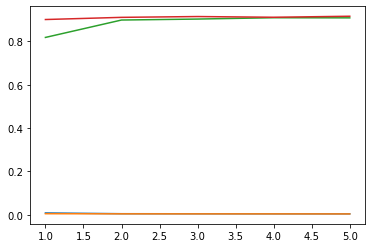

In [35]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import time
import os
import shutil
from torchvision import datasets,transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import lr_scheduler

start=time.time()

base_dir = r'C:\Users\DELL\Desktop\class9 transfer learning example2\class9 transfer learning example\data\aaa'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

tran_transformation = transforms.Compose([
    transforms.Resize(224),
    #随机把图片裁剪到192*192像素
    transforms.RandomCrop(192),
    #随机水平翻转 默认参数0.5
    transforms.RandomHorizontalFlip(),
    #图片随机旋转一定角度
    transforms.RandomRotation(0.2),
    #改变图片亮度、对比度、饱和度、色调
    transforms.ColorJitter(brightness=0.5),
    transforms.ColorJitter(contrast=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])

test_transformation = transforms.Compose([
    transforms.Resize((192,192)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])

train_ds = torchvision.datasets.ImageFolder(
    train_dir,
    transform=tran_transformation
)
test_ds = torchvision.datasets.ImageFolder(
    test_dir,
    transform=test_transformation
)

BATCHSIZE=64

train_dl = torch.utils.data.DataLoader(
    train_ds,
    batch_size=BATCHSIZE,
    shuffle=True,
)
test_dl = torch.utils.data.DataLoader(
    train_ds,
    batch_size=BATCHSIZE,
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torchvision.models.resnet18(pretrained=True)
#print(model)

#将卷积部分冻结
for param in model.parameters():
    #将卷积层部分的参数冻结
    param.requires_grad = False

#model.fc.会返回仅有一个的线性层
#继承原有线性层的输入特征数
in_f = model.fc.in_features
#自己构造线性层并替换原来线性层
model.fc = nn.Linear(in_f,4)
#只需要优化最后的Linear层参数
optimizer = torch.optim.Adam(model.fc.parameters(),lr=0.001)
#对学习速率进行衰减
exp_lr_schedule = lr_scheduler.StepLR(optimizer,step_size=5,gamma=0.1)
epochs = 5
loss_fn = nn.CrossEntropyLoss()
model = model.to(device)

def fit(epoch,model,trainloader,testloder):
    #下面三个是个数不是概率
    correct = 0
    total = 0
    running_loss = 0
    #Dropput在训练的时候回随机丢弃神经元(的输出),但预测的时候不会
    #model.train()是训练模式,想让Dropout发挥作用,对BN层也有用
    model.train()
    for x,y in trainloader:
        #将训练数据也放到GPU上
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        # 梯度置为0
        optimizer.zero_grad()
        # 反向传播求解梯度
        loss.backward()
        # 优化
        optimizer.step()
        # 不需要进行梯度计算
        with torch.no_grad():
            #torch.argmax将数字转换成真正的预测结果
            y_pred = torch.argmax(y_pred, dim=1)
            #计算个数
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()

    #一旦exp_lr_schedule.step()运行了5次就调整学习速率
    exp_lr_schedule.step()
    #除以的是总样本数 trainloader.dataset是形参,实参是train_dl即train_dl.dataset
    #train_dl.dataset指向的是train_ds
    epoch_loss = running_loss/len(trainloader.dataset)
    epoch_acc = correct/total

    test_correct = 0
    test_total = 0
    test_running_loss = 0

    #model.eval()是预测模式,不让Dropout发挥作用,对BN层也有用
    model.eval()
    with torch.no_grad():
        for x,y in testloder:
            #将测试数据也要放到GPU上
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred,y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

    epoch_test_loss = test_running_loss / len(test_dl.dataset)
    epoch_test_acc = test_correct / test_total

    print('epoch: ',epoch,
          'train_loss: ',round(epoch_loss,3),
          'train_accuracy: ',round(epoch_acc,3),
          'test_loss: ',round(epoch_test_loss,3),
          'test_accuracy: ',round(epoch_test_acc,3)
              )

    return epoch_loss,epoch_acc,epoch_test_loss,epoch_test_acc


#便于随着训练的进行观察数值的变化
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

for epoch in range(epochs):
    epoch_loss,epoch_acc,epoch_test_loss,epoch_test_acc = fit(epoch,model,train_dl,test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)



plt.plot(range(1,epochs+1),train_loss,label='train_loss')
plt.plot(range(1,epochs+1),test_loss,label='test_loss')
plt.plot(range(1,epochs+1),train_acc,label='train_acc')
plt.plot(range(1,epochs+1),test_acc,label='test_acc')
plt.show()


In [ ]:
from glob import glob
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from sklearn.model_selection import KFold
from mpl_toolkits.axes_grid1 import host_subplot
import time
%matplotlib inline


def try_gpu(i=0):
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

path = 'data/aaa/train/'
files = glob(os.path.join(path, '*/*.jpg'))
print(f'Total train of images {len(files)}')
path = 'data/aaa/test/'
files = glob(os.path.join(path, '*/*.jpg'))
print(f'Total valid of images {len(files)}')

# imag_size = 224
# batch_size = 16
imag_size = 200
batch_size = 64
# 数据增强
transform = transforms.Compose([
    transforms.Resize((imag_size, imag_size)),
    transforms.RandomHorizontalFlip(),# 随机水平翻转 
    transforms.RandomVerticalFlip(), # 随机竖直翻转    
    transforms.RandomRotation(45), # 随机角度旋转 
    transforms.RandomCrop((imag_size, imag_size)), # 随机位置裁取
    transforms.ToTensor(),
    # ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
transform_test = transforms.Compose([
    transforms.Resize((imag_size, imag_size)),
    transforms.ToTensor(),
])
train_imgs = ImageFolder('data/aaa/train', transform)
test_imgs = ImageFolder('data/aaa/test', transform_test)


def kfold(data, k=5): 
    """ K折交叉验证 """
    X = np.arange(len(data))
    KF = KFold(n_splits=k,shuffle=True)
    for train_idxs, valid_idxs in KF.split(X):
        train_iter, valid_iter = [] , []
        for i in train_idxs:
            train_iter.append(data[i])
        for i in valid_idxs:
            valid_iter.append(data[i]) 
        train_data = torch.utils.data.DataLoader(train_iter, shuffle=True, 
                                                 batch_size = batch_size)
        valid_data = torch.utils.data.DataLoader(valid_iter, batch_size = batch_size)
        yield train_data, valid_data

def train(data, isTrain=True):

    if isTrain:
        model.train()
    else:
        model.eval()

    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in data:

        if isTrain:
            optimizer.zero_grad()

        inputs, labels = Variable(
            inputs.to(device)), Variable(labels.to(device))
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        if isTrain:
            loss.backward()
            optimizer.step()

        running_loss += loss.data
        running_corrects += torch.sum(preds == labels.data)

    loss = running_loss / len(data) / batch_size
    acc = running_corrects / len(data) / batch_size

    return loss, acc

def test(data):
    real_lables,pred_lables = [],[]
    model.eval()
    running_corrects = 0
    for inputs, labels in data:
        inputs, labels = Variable(
            inputs.to(device)), Variable(labels.to(device))
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        for y in labels:
            real_lables.append(y.item())
        for y in preds:
            pred_lables.append(y.item())
        running_corrects += torch.sum(preds == labels.data)

    acc = running_corrects / len(data) / batch_size
    return acc, running_corrects, real_lables, pred_lables

# 设置超参数
train_iterations, train_loss, test_accuracy =[], [], []
model = models.vgg16(pretrained=False)
# model_ft.load_state_dict(torch.load('data/resnet50-19c8e357.pth'))
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 8)

k = 5
lr, num_epochs = 2e-4, 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
device = try_gpu(0)

# 开始训练
print('训练开始 on', device)
model.to(device)
for epoch in range(num_epochs):
    loss, acc = 0.0, 0.0
    for train_data, valid_data in kfold(train_imgs, k):  # k折交叉验证
        train_losses, train_acc = train(train_data)
        valid_losses, valid_acc = train(valid_data, False)
        loss += valid_losses
        acc += valid_acc
    if epoch % 1 == 0:  # 每隔10次输出一次结果
        train_iterations.append(epoch)
        train_loss.append((loss/k).to('cpu').item())
        test_accuracy.append((acc/k).to('cpu').item())
        print('{},{:.4f},{:.4f}'.format(epoch, loss/k, acc/k))
#         print('Epoch {}/{}  avgLoss: {:.4f}  Acc: {:.4f}'.format(epoch + 1, num_epochs, loss/k, acc/k))
train_iterations.append(num_epochs - 1)
train_loss.append((loss/k).to('cpu').item())
test_accuracy.append((acc/k).to('cpu').item())
print('{},{:.4f},{:.4f}'.format(num_epochs - 1, loss/k, acc/k))
print('训练结束')
torch.save(model, 'C:/Users/DELL/Desktop/class9 transfer learning example2/class9 transfer learning example/vgg16-397923af.pth')
# self.model.load_state_dict(torch.load("C:/Users/DELL/Desktop/class9 transfer learning example2/class9 transfer learning example/resnet18-5c106cde)

print('测试 on', device)
model.to(device)
test_data = torch.utils.data.DataLoader(test_imgs, shuffle=True, batch_size=batch_size)
acc, corrects, real, pre = test(test_data)
print('准确率: {:.4f}  正确预测个数: {}'.format(acc, corrects))

# k = 0
# while k < len(real_lables):
#     print(real_lables[k], pred_lables[k])
#     k = k + 1


# 绘制曲线图
host = host_subplot(111)
plt.subplots_adjust(right=0.8) # ajust the right boundary of the plot window
par1 = host.twinx()

# 设置类标
host.set_xlabel("iterations")
host.set_ylabel("loss")
par1.set_ylabel("validation accuracy")

# 绘制曲线
p1, = host.plot(train_iterations, train_loss, "b-", label="training loss")
p2, = host.plot(train_iterations, train_loss, ".") #曲线点
p3, = par1.plot(train_iterations, test_accuracy, label="validation accuracy")
p4, = par1.plot(train_iterations, test_accuracy, "1")

# 设置图标
# 1->rightup corner, 2->leftup corner, 3->leftdown corner
# 4->rightdown corner, 5->rightmid ...
host.legend(loc=5)

# 设置颜色
host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p3.get_color())

# 设置范围
host.set_xlim([0, num_epochs - 1])

plt.draw()
plt.show()


#--------------------------------------------------------------------------
# 第一部分 计算准确率 召回率 F值
#--------------------------------------------------------------------------

# 计算各类结果 共10类图片
# real_8 = list(range(0, 8))   #真实10个类标数量的统计
real_8 = list(range(0, 2))
pre_8 = list(range(0, 2))    #预测10个类标数量的统计
right_8 = list(range(0, 2))  #预测正确的10个类标数量

k = 0
while k < len(real):
    v1 = int(real[k])
    v2 = int(pre[k])
#     print(v1, v2)
    real_8[v1] = real_8[v1] + 1     # 计数
    pre_8[v2] = pre_8[v2] + 1       # 计数
    if v1==v2:
        right_8[v1] = right_8[v1] + 1
    k = k + 1
# print("统计各类数量")
# print(real_10, pre_10, right_10)

# 准确率 = 正确数 / 预测数
precision = list(range(0, 2))   #8
k = 0
while k < len(real_8):
    value = right_8[k] * 1.0 / pre_8[k] 
    precision[k] = value
    k = k + 1
print('准确率: ')
print(precision)

# 召回率 = 正确数 / 真实数
recall = list(range(0, 2))
k = 0
while k < len(real_8):
    value = right_8[k] * 1.0 / real_8[k] 
    recall[k] = value
    k = k + 1
print('召回率: ')
print(recall)
   
# F值 = 2*准确率*召回率/(准确率+召回率)
f_measure = list(range(0, 2))
k = 0
while k < len(real_8):
    value = (2 * precision[k] * recall[k] * 1.0) / (precision[k] + recall[k])
    f_measure[k] = value
    k = k + 1
print('F值: ')
print(f_measure)

#--------------------------------------------------------------------------
# 第二部分 绘制曲线
#--------------------------------------------------------------------------

# 设置类别
n_groups = 2    #8
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2
 
opacity = 0.4
error_config = {'ecolor': '0.3'}

# 用来正常显示中文标签
# plt.rcParams['font.sans-serif']=['SimHei']
# 绘制
rects1 = ax.bar(index, precision, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='precision')
 
rects2 = ax.bar(index + bar_width, recall, bar_width,
                alpha=opacity, color='m',
                error_kw=error_config,
                label='recall')
 
rects3 = ax.bar(index + bar_width + bar_width, f_measure, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='f_measure')
        
# 设置标签
ax.set_xticks(index + 3 * bar_width / 3)
ax.set_xticklabels(('0-desk', '1-dining table', '2-double bed', '3-sofa', '4-squatting toilet',
                    '5-TV cabinet', '6-wardrobe', '7-washbasin'))
# 设置类标
ax.legend()
plt.xlabel("lable")
plt.ylabel("evaluation")
fig.set_figheight(5)
fig.set_figwidth(10)
fig.tight_layout()
# plt.savefig('result.png', dpi=200)
plt.show()

Total train of images 9378
Total valid of images 1989
训练开始 on cpu
